# API documentation

The functions below are part of the pypo module and are
separted below based on their functionality.

## Conventional mapping (AIS to AOS)

### Forward mapping

```{eval-rst}
.. autofunction:: pypo.AIS2AOS_map
```

###### Example
Obtaining the Achievable Output Set (AOS) for the shower problem.

Importing PyPO and Numpy:

In [1]:
    from pypo import AIS2AOS_map
    import numpy as np

Defining the equations that describe the process:

```{math}
\left\{\begin{array}{c}
y_1=u_1+u_2 \\
y_2=\frac{\left(60 u_1+120 u_2\right)}{\left(u_1+u_2\right)}
\end{array}\right. \\
\\
y_1 = 0\rightarrow y_2 = \frac{(60+120)}{2}
```

In [2]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

Defining the AIS bounds, as well as the discretization resolution:

In [3]:
    AIS_bounds =  np.array([[0, 10], [0, 10]])
    resolution =  [5, 5]

Obtain discretized AIS/AOS.

In [4]:
    AIS, AOS =  AIS2AOS_map(shower_problem, AIS_bounds,  resolution)
    print(AOS)

[[[  0.       90.     ]
  [  2.5     120.     ]
  [  5.      120.     ]
  [  7.5     120.     ]
  [ 10.      120.     ]]

 [[  2.5      60.     ]
  [  5.       90.     ]
  [  7.5     100.     ]
  [ 10.      105.     ]
  [ 12.5     108.     ]]

 [[  5.       60.     ]
  [  7.5      80.     ]
  [ 10.       90.     ]
  [ 12.5      96.     ]
  [ 15.      100.     ]]

 [[  7.5      60.     ]
  [ 10.       75.     ]
  [ 12.5      84.     ]
  [ 15.       90.     ]
  [ 17.5      94.28571]]

 [[ 10.       60.     ]
  [ 12.5      72.     ]
  [ 15.       80.     ]
  [ 17.5      85.71429]
  [ 20.       90.     ]]]


### Inverse mapping (AOS/DOS to AIS/DIS)

### NLP-Based

```{eval-rst}
.. autofunction:: pypo.nlp_based_approach
```

###### Example
Obtaining the Feasible Desired Input Set (DIS*) for the shower problem.

Importing PyPO and Numpy:

In [5]:
    import numpy as np
    from pypo import nlp_based_approach

Defining lower and upper bound for the AIS/DIS inverse map:

In [6]:
    lb = np.array([0, 0])
    ub = np.array([100,100])

Defining DOS bounds and resolution to obtain the inverse map:

In [7]:
    DOS_bound = np.array([[17.5, 21.0],
                          [80.0, 100.0]])
    resolution = [5, 5]

Defining the equations that describe the process:

```{math}
\left\{\begin{array}{c}
y_1=u_1+u_2 \\
y_2=\frac{\left(60 u_1+120 u_2\right)}{\left(u_1+u_2\right)}
\end{array}\right. \\
\\
y_1 = 0\rightarrow y_2 = \frac{(60+120)}{2}
```

In [8]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

Obtaining the DIS*, DOS* and the convergence for each inverse map run. 
Additionally, using IPOPT as NLP solver, enabling plotting of the process operability
sets, cold-starting the
NLP and using finite-differences:

  0%|                                                                                                                                                | 0/25 [00:00<?, ?it/s]

  8%|██████████▉                                                                                                                             | 2/25 [00:00<00:01, 12.80it/s]

 16%|█████████████████████▊                                                                                                                  | 4/25 [00:00<00:01, 12.80it/s]

 24%|████████████████████████████████▋                                                                                                       | 6/25 [00:00<00:01, 13.41it/s]

 32%|███████████████████████████████████████████▌                                                                                            | 8/25 [00:00<00:01, 13.16it/s]

 40%|██████████████████████████████████████████████████████                                                                                 | 10/25 [00:00<00:01, 13.53it/s]

 48%|████████████████████████████████████████████████████████████████▊                                                                      | 12/25 [00:00<00:00, 13.27it/s]

 56%|███████████████████████████████████████████████████████████████████████████▌                                                           | 14/25 [00:01<00:00, 12.69it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████████▍                                                | 16/25 [00:01<00:00, 12.72it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 18/25 [00:01<00:00, 12.75it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 20/25 [00:01<00:00, 13.17it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 22/25 [00:01<00:00, 12.79it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 24/25 [00:01<00:00, 12.79it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:01<00:00, 12.91it/s]

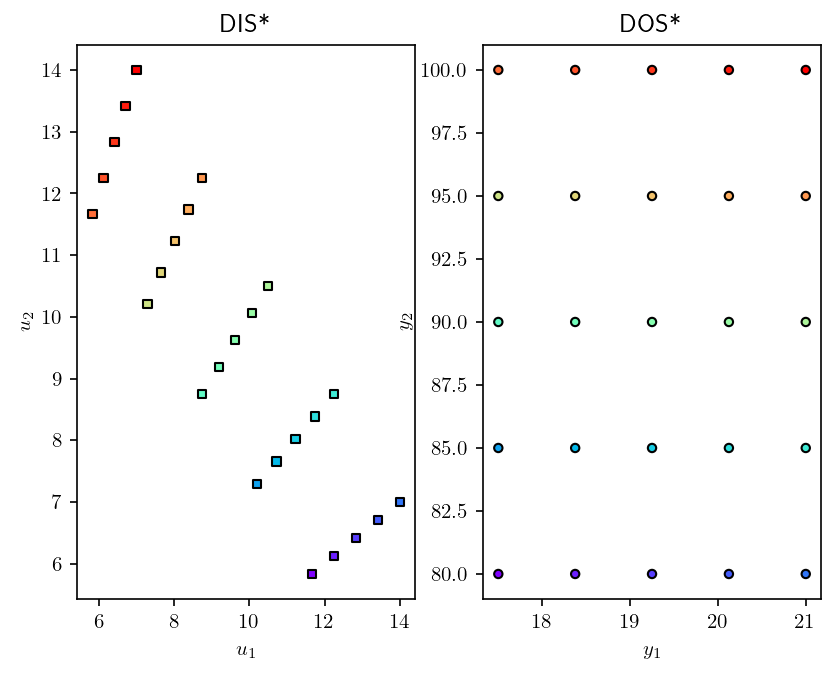

In [9]:
    u0 = u0 = np.array([0, 10]) # Initial estimate for inverse mapping.
    fDIS, fDOS, message = nlp_based_approach(DOS_bound, 
                                             resolution, 
                                             shower_problem, 
                                             u0, 
                                             lb,
                                             ub, 
                                             method='ipopt', 
                                             plot=True, 
                                             ad=False,
                                             warmstart=False)

## Implicit mapping

```{eval-rst}
.. autofunction:: pypo.implicit_map
```

## Multimodel representation

```{eval-rst}
.. autofunction:: pypo.multimodel_rep
```

###### Example
Obtaining the Achievable Output Set (AOS) for the shower problem.

Importing PyPO and Numpy:

In [10]:
    from pypo import multimodel_rep
    import numpy as np

Defining the equations that describe the process:

```{math}
\left\{\begin{array}{c}
y_1=u_1+u_2 \\
y_2=\frac{\left(60 u_1+120 u_2\right)}{\left(u_1+u_2\right)}
\end{array}\right. \\
\\
y_1 = 0\rightarrow y_2 = \frac{(60+120)}{2}
```

In [11]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

Defining the AIS bounds and the discretization resolution:

In [12]:
    AIS_bounds =  np.array([[1, 10], [1, 10]])
    AIS_resolution =  [5, 5]

Obtaining multimodel representation of paired polytopes for the AOS:

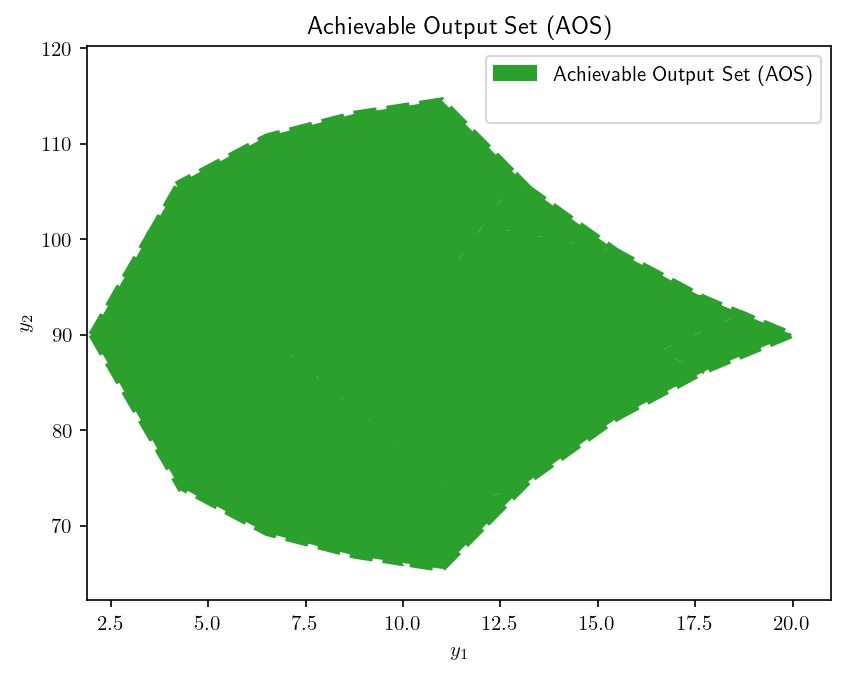

In [13]:
    AOS_region  =  multimodel_rep(AIS_bounds, AIS_resolution, shower_problem)

## OI evaluation

```{eval-rst}
.. autofunction:: pypo.OI_eval
```

###### Example
Evaluating the OI for the shower problem for a given DOS.



Importing PyPO and Numpy:

In [14]:
    from pypo import multimodel_rep, OI_eval
    import numpy as np

Defining the equations that describe the process:

```{math}
\left\{\begin{array}{c}
y_1=u_1+u_2 \\
y_2=\frac{\left(60 u_1+120 u_2\right)}{\left(u_1+u_2\right)}
\end{array}\right. \\
\\
y_1 = 0\rightarrow y_2 = \frac{(60+120)}{2}
```

In [15]:
    def shower_problem(u):
        y = np.zeros(2)
        y[0]=u[0]+u[1]
        if y[0]!=0:
            y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
        else:
            y[1]=(60+120)/2
            
        return y

Defining the AIS bounds and the discretization resolution:

In [16]:
    AIS_bounds =  np.array([[1, 10], [1, 10]])
    AIS_resolution =  [5, 5]

Obtaining multimodel representation of paired polytopes for the AOS:

In [17]:
    AOS_region  =  multimodel_rep(AIS_bounds, AIS_resolution, shower_problem,
    plotting=False)

Either plotting is not possible (dimension > 3) or you have chosen plotting=False. The operability set is still returned as a polytopic region of general dimension.


Defining a DOS region between $y_1 =[10-20], y_2=[70-100]$

In [18]:
    DOS_bounds =  np.array([[10, 20], 
                            [70, 100]])

Evaluating the OI and seeing the intersection between the operability sets:

In [19]:
    OI = OI_eval(AOS_region, DOS_bounds)

RuntimeError: `polytope.solvers.lpsolve` returned:  {'status': 3, 'x': None, 'fun': None}
its docstring describes return values

## Utilities

```{eval-rst}
.. autofunction:: pypo.create_grid
```
###### Example
Creating a 2-dimensional discretized rectangular grid for given DOS bounds.

In [ ]:
    from pypo import create_grid
    DOS_bounds =  np.array([[10, 20], 
                            [70, 100]])

    DOS_resolution =  [3, 3]

    DOSPts = create_grid(DOS_bounds, DOS_resolution)

    print(DOSPts)

Visualizing this grid:

In [ ]:
    import matplotlib.pyplot as plt
    DOSPts = DOSPts.reshape(-1, 2)
    plt.scatter(DOSPts[:, 0], DOSPts[:, 1])

```{eval-rst}
.. autofunction:: pypo.points2simplices
```

###### Example
Generating paired simplicial polytopes for the AIS/AOS generated for the
shower problem example.

In [ ]:
    from pypo import points2simplices
    AIS_poly, AOS_poly = points2simplices(AIS,AOS)
    print('AIS Simplices \n', AIS_poly)
    print('AOS Simplices \n', AOS_poly)

```{eval-rst}
.. autofunction:: pypo.points2polyhedra
```
###### Example
Generating paired polyhedrons for the AIS/AOS generated for the
shower problem example.

In [ ]:
    from pypo import points2polyhedra
    AIS_poly, AOS_poly = points2polyhedra(AIS,AOS)
    print('AIS Polyhedrons \n', AIS_poly)
    print('AOS Polyhedrons \n', AOS_poly)

```{eval-rst}
.. autosummary::
   :toctree: _autosummary
   :recursive:

   pypo
```